#Motor dimensions

There are two traction motor so the torque and the power must be divided to two.

**270kW/2=135 kW**

**406Nm/2=203 Nm**

The motors are 3 phase

I assumed that efficiency≅0.9 due to that “Tesla's electric motor is not just a great generator of torque - it is able to create torque efficiently. The Roadster achieves an overall driving efficiency of 88%, about three times the efficiency of a conventional car.” 

if efficiency of the car is %88, motor efficiency would be %94 but i selected %90 
http://my.teslamotors.com/roadster/technology/motor


**Ds=**stator inner diameter  

**leff=**core effective lenght

**p=**pole number (not pole pair)

**ns**=stator speed rpm

**A=**electrical loading

**m=** # of phases (3 phases)

####I assumed that flux is sinusoidal


f=(p*n_s)/120

##$x=\frac{p*ns}{120}$   *eq.1*

##$\frac{S}{n_{eff}*cosθ}$=$\ m*V _{phase}*I_ {phase} $ *eq.2*


##$I_{phase}=\frac{(A*π*D_s)}{(2*N_s*m)}$ *eq.3*

##$\ V _{phase} $=$ N_s*2*pi*f*k_w*B_{max}*\frac{2}{pi}*\frac{pi*D_s}{p}*l_{eff}*I_{phase}*\frac1{{\sqrt{2}}}$ *eq.4*

## $\frac{S}{(n_{eff}*cosθ*k_w} )=\frac{√2 π^2}{120*}n_s*B_{max}*A*D_s^2* l_{eff}$ *eq.5*

I assumed that B_max=0.8 at airgap and A=40000 kA/m

In [41]:
import math
pi=3.1415927
Vm=135000/0.9/0.9/0.9/math.sqrt(2)/(pi**2)*120/6000/0.8/40000 #Vm Ds^2*leff
print Vm # m^3

0.00829223309196


##$ \frac{D_s-2g}{l_{eff}}=\frac {pi}{p}*(p/2)^{1/3} $*eq.6*

In [42]:
p=4
ratio=pi/p*((2)**(1.0/3.0)) # Dr/leff is ratio
print ratio

0.989539693232


## $ D_s ≅l_{eff} $

In [43]:
Ds=Vm**(1.0/3.0)  #stator diameter in meter
print Ds


0.202406210427


## $ σ_{tan}=\frac {2T}{π*Ds^2*l}$ *eq.7*

In [44]:
leff=Ds

In [45]:
T=441.0/2.0 # due to double motor
leff=Ds
tangentialstress=2.0*T/(pi*Ds*Ds*leff)
print tangentialstress # F/m2

16928.4505364


it is in the range of table 6.4 lecture book. 12000< tan.stress< 330000

###grafik denemeleri

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

[ 0.          1.66666667  3.33333333  5.        ]


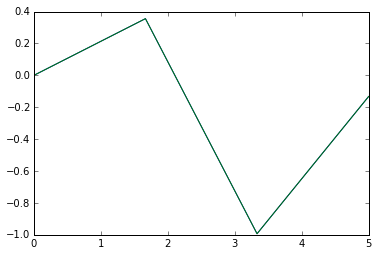

In [47]:
t = np.linspace(0.0,5.0,4);
plt.plot(t,np.sin(t**2))
fig = plt.plot(t,np.sin(t**2))
from pylab import rcParams
rcParams['figure.figsize'] = 4, 4
print t

## Airgap length Selection

In [48]:
Speedperipheral=0.202*pi*6000/60
print Speedperipheral # m/s

63.46017254


**63.5 m/s < 100 m/s so eq. 6.26 in the book is not valid for the motor**

Equation 6.24 for p>2 for 50 hertz machines

##$ lg=\frac{0.18+0.006*P^{0.4}}{1000} $  *eq.8*

In [49]:
P=135000 # power output of the motor
lg=(0.18 +0.006*P**0.4)/1000
print lg  # meter
print lg*1000

0.000856526414178
0.856526414178


Equation from B.E notes $ g=0.2+2√(D_s*l)≅0.604 mm $**eq.9**

***I choose airgap as o.9 mm due to 200 hertz>50 hertz***

In [50]:
Dr=Ds-2*lg
print Dr  # meter Diameter of the rotor

0.200693157598


## Choosing Slot Number

1-In tesla, slot number is 48. 

2-From table 6.7 page 309      slot pitch for IM is 7-45mm

3-From B.E notes slot-pitch must be greater 10-15 mm for mechanical considerations


## I choose 10 mm as a limitation

In [51]:
slotnumber= Ds*pi/12*1000
print slotnumber

52.9898227593


**multiple of 12 (3*4) is possible slot number which is smaller than 63. so possible slot numbers are 48,36,24 **

48 and 36 is optimum slot number due to increasing slot number cause well distributed mmf in air gap and low harmonic content

#### After comparison of kw value of 48 and 36 slot number will be choosen

### 3.harmonics are destroyed by the motor winding so below the calculations of kw , ignore the second value(3.harmonics and multiples 9)

In [52]:
#this is for #of slot 48 and 165 degree chording
slotnumber= 48.0
q=slotnumber/12.0
x = np.arange(1,13,2)
teta=180/(slotnumber/4)
kd=(np.sin(x*180/slotnumber*q*math.pi/180))/(q*(np.sin(x*180/slotnumber*math.pi/180)))
kc=np.sin(x*(180-teta)/2*math.pi/180)  
print kd*kc
print  x    # harmonic numbers         


[ 0.98085831 -0.8371526   0.59600684 -0.3323725   0.12176591 -0.01280916]
[ 1  3  5  7  9 11]


In [53]:
#this is for #of slot 48 and 150 degree chording
slotnumber= 48.0
q=slotnumber/12.0
x = np.arange(1,13,2)
teta=180/(slotnumber/4)
kd=(np.sin(x*180/slotnumber*q*math.pi/180))/(q*(np.sin(x*180/slotnumber*math.pi/180)))
kc=np.sin(x*(180-2*teta)/2*math.pi/180)  
print kd*kc
print  x    # harmonic numbers     


[ 0.95561177 -0.64072886  0.19443785  0.14131042 -0.22499406  0.09479093]
[ 1  3  5  7  9 11]


In [54]:
#this is for #of slot 48 and 135 degree chording
slotnumber= 48.0
q=slotnumber/12.0
x = np.arange(1,13,2)
teta=180/(slotnumber/4)
kd=(np.sin(x*180/slotnumber*q*math.pi/180))/(q*(np.sin(x*180/slotnumber*math.pi/180)))
kc=np.sin(x*(180-3*teta)/2*math.pi/180)  
print kd*kc
print  x    # harmonic numbers     


[ 0.91401444 -0.34675996 -0.287491    0.50442116 -0.2939689   0.03755456]
[ 1  3  5  7  9 11]


In [55]:
#this is for #of slot 36 and 160 degree chording
slotnumber= 36.0
q=slotnumber/12.0
x = np.arange(1,13,2)
teta=180/(slotnumber/4)
kd=(np.sin(x*180/slotnumber*q*math.pi/180))/(q*(np.sin(x*180/slotnumber*math.pi/180)))
kc=np.sin(x*(180-1*teta)/2*math.pi/180)  
print kd*kc
print  x    # harmonic numbers     


[  9.74833458e-01  -7.88675135e-01   4.89713144e-01  -1.91991900e-01
  -1.63286240e-16   3.60215288e-02]
[ 1  3  5  7  9 11]


In [56]:
#this is for #of slot 36 and 140 degree chording
slotnumber= 36.0
q=slotnumber/12.0
x = np.arange(1,13,2)
teta=180/(slotnumber/4)
kd=(np.sin(x*180/slotnumber*q*math.pi/180))/(q*(np.sin(x*180/slotnumber*math.pi/180)))
kc=np.sin(x*(180-2*teta)/2*math.pi/180)  
print kd*kc
print  x    # harmonic numbers    

[ 0.93017526 -0.4553418  -0.13229532  0.43001657 -0.33333333  0.08067973]
[ 1  3  5  7  9 11]


**i analyzed the slot number effect on kw, the bigger machine means more slot then high first kw and low other harmonics** 
burasi bitmedi array yazmayi ogrenince

In [57]:
#EKSIK TAMAMLA
slotnumber= 72.0
q=slotnumber/12.0
x = np.arange(1,13,2)
x = np.arange(1,13,2)
teta=180/(slotnumber/4)
kd=(np.sin(x*180/slotnumber*q*math.pi/180))/(q*(np.sin(x*180/slotnumber*math.pi/180)))
kc=np.sin(x*(180-3*teta)/2*math.pi/180)  
print kd*kc
print  x    # harmonic numbers  

[ 0.95523273 -0.63844146  0.19250943  0.1385629  -0.21776049  0.09023669]
[ 1  3  5  7  9 11]


### slot number is chosen as a 48 and 150 degree chording (two slots)

###kw=[ 0.95561177 ,  0.19443785,  0.14131042 ,  0.09479093]
###(1,5,7,11)

##Finding Ns

**Tesla battery is 375 Volt **

**Inverter base**

**With over modulation Space Vector Modulation switching makes it**

$ V_{phasepeak}=0.5*1.15V_{dcbulk} $


https://www.youtube.com/watch?v=X1cqUuKqOH8
https://www.youtube.com/watch?v=fpLflPPytG8
###So the V_phasepeak≤215.625 V for Y connected machine.
http://my.teslamotors.com/forum/forums/technical-battery-discussion
###I chose V_phasepeak=178=126.53*√2≅120 V american grid voltage 


**“The Power Electronics Module supplies as much as 900 amps of current to the stator. “ **

http://my.teslamotors.com/roadster/technology/motor 


$ Em≈U_m*0.95=120 rms $

###$ Ns= \frac{√2*E_m}{2*pi*f*kw*flux_{max}} $  

##$ N_s=\frac{√2*120}{2*π*200*0.955*0.8*\frac{2}{π}*Ds*\frac{π}{4}*l} $

In [58]:
Ns=(2**0.5*120)/(2*math.pi*200*0.955*0.8*0.5*Ds*leff)
print Ns

8.62929566205


In [59]:
d=8.62929566205*2.0*3.0/48.0
print d # number of series conductor in one slot

1.07866195776


**For double layer d must be 2 for minimum value. so Ns must be 16 for minimum otherwise single layer is possible**

In [60]:
Bmax=(2**0.5*120)/(2*math.pi*200*0.955*16*0.5*Ds*leff) # Ns=16 olarak degistirdigimde Bmax
print Bmax

0.431464783103


I assumed Bmax=0.5 T if required, i will make Vm bigger

it is too low according to the table 6.2 but if we look the figure below, we can see that small teeth width and large copper area is seen. due to this it is not too low.

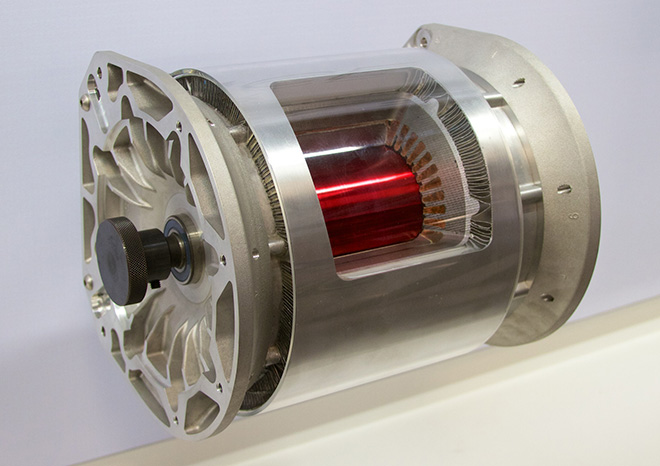

In [61]:
from IPython.display import Image
Image(filename='teslamotorici.jpg')

###Tooth width 
For now no ventilation duct exist, kfe=0.97 bmax tooths=1.5T
bmax toothr=1.6T
###$ b_{ds}=\frac{l_{eff} *τ_{us}}{kfe*(l-bv)}*Bmaxairgap/(bmax tooths)+0.1mm $





In [62]:
bds=(leff*((Ds*math.pi)/48.0))/(0.97*(leff-2*lg))*0.5/1.5*1000+0.1
print bds

4.69124795601


In [63]:
bdr=(leff*((Ds*math.pi)/68.0))/(0.97*(leff-2*lg))*0.5/1.6*1000+0.1
print bdr #rotor tooth width in mm

3.13832585324


In [64]:
Iphase=135000.0/0.9/0.9/3/120
print Iphase #  Amper per phase

462.962962963


In [65]:
Fillfactor=0.7
Scu=Iphase*2/5.5/Fillfactor # Scu copper area, 5.5A/mm2, and double layer
print Scu #mm2

240.5002405


I assumed Scu as a rectangle


In [66]:
Depthslotstator= Scu/((Ds*math.pi/48*1000)-bds)
print Depthslotstator

28.1082757085


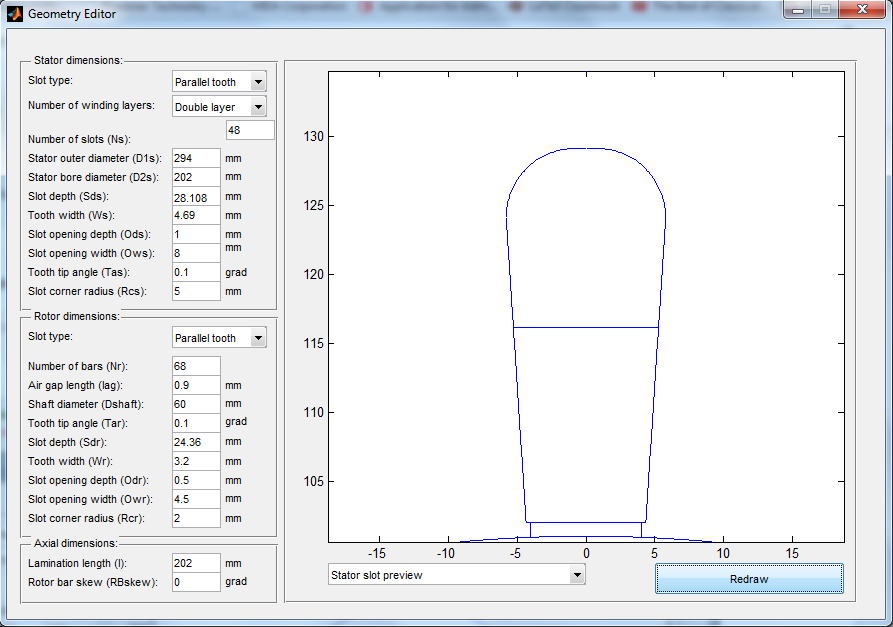

In [67]:
from IPython.display import Image
Image(filename='statorslot.PNG')

In [68]:
Ir=Iphase*2*48/68*0.9
print Ir

588.235294118


In [69]:
Depthrotor=24.5 # i calculated area from matlab figure (2+6)/2*(9-bdr) and current density is 6A/mm2
print Depthrotor

24.5


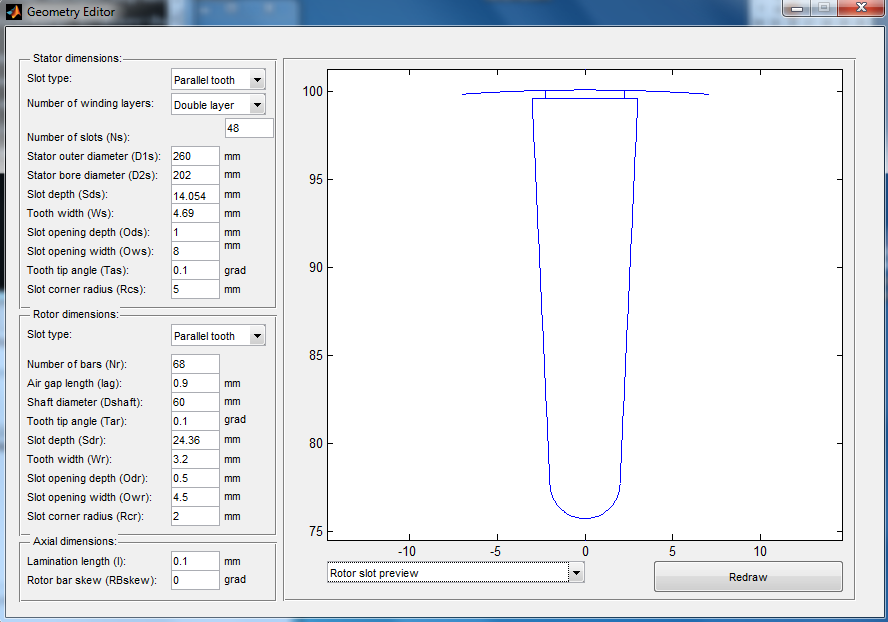

In [70]:
from IPython.display import Image
Image(filename='Rotordimension.png')

In [71]:
poleflux=0.5*2/(math.pi)*Ds*(math.pi)/4*leff
print poleflux
print leff


0.0102420685048
0.202406210427


In [72]:
hys=poleflux/2/0.97/leff/1.5 # 1.5 tesla 0.97 stacking factor of iron
print hys # mm

0.017388849693


In [73]:
hyr=hys
print hyr

0.017388849693


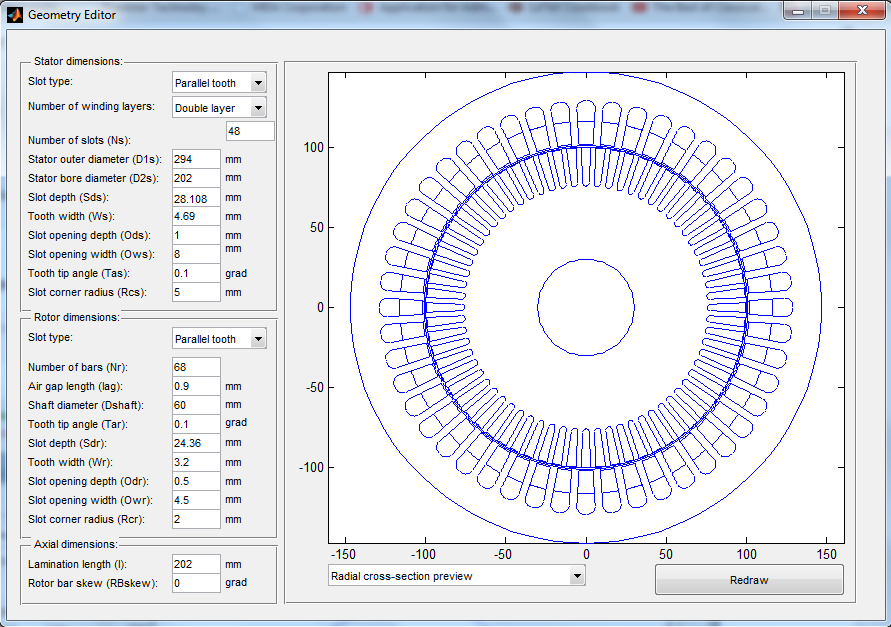

In [74]:
from IPython.display import Image
Image(filename='Hepsi.png')

i will make shaft diameter bigger.

In [75]:

print Ds
print hys
print Depthslotstator
print Ds+2*(hys+Depthslotstator)/1000 # in meter

0.202406210427
0.017388849693
28.1082757085
0.258657539543


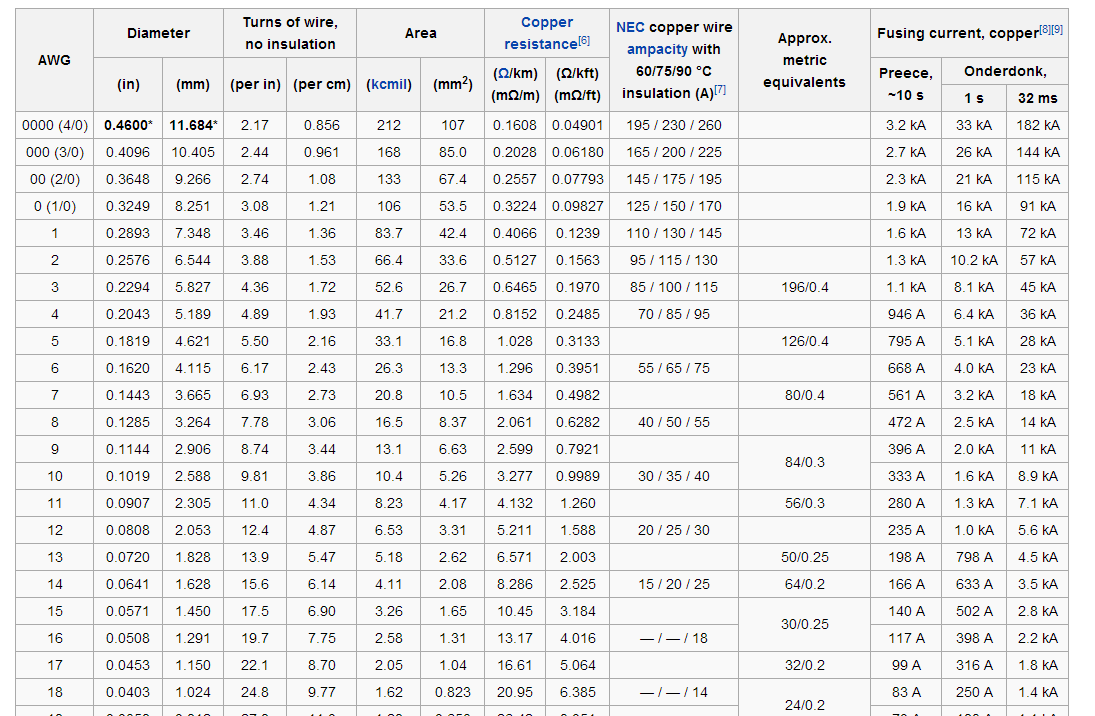

In [76]:
from IPython.display import Image
Image(filename='bakirsecimi.png')

AWG 14 is selected 2.08 mm2 area. 240mm2*0.7 fill factor

In [77]:
Qpar=(Scu*0.7)/2.08/2   #number of paralel copper in one slot of stator double layer
print Qpar


40.4687904688


40 parallel copper in one slot

from table 4.1 and 4.2 and eq 4.98 from lecture book

In [85]:
Dave=Ds+Depthslotstator/1000
Wew=Dave*math.pi/4*10/12 # 10/12 coil span in meter
lew=0.05 #meter
print Wew*lew
print Wew

0.00754356891863
0.150871378373


In [88]:
N0=4*math.pi*10**(-7)
lend=1*40*40*N0*0.00754356891863*1000 # mH
print lend

0.0151672452458


http://www.engineeringtoolbox.com/resistivity-conductivity-d_418.html

In [101]:
R=(0.202*2*Wew*2*(1.724 * 10**(-8))) /2.08*(( 4.29 * 10**(-3))*100)*10**6    #2.08 mm2 copper area at 100 degree
print R

0.000433460410148


In [105]:
R=(R/40.0)*8 # phase resistance 40 parallel 2*4 slot series
print R

8.66920820295e-08


###Rendring

In [112]:
Iendr=Ir/(2*math.sin(math.pi*2/68))
Send=Iendr/5
print Iendr
print Send #mm2

3187.63277866
637.526555733


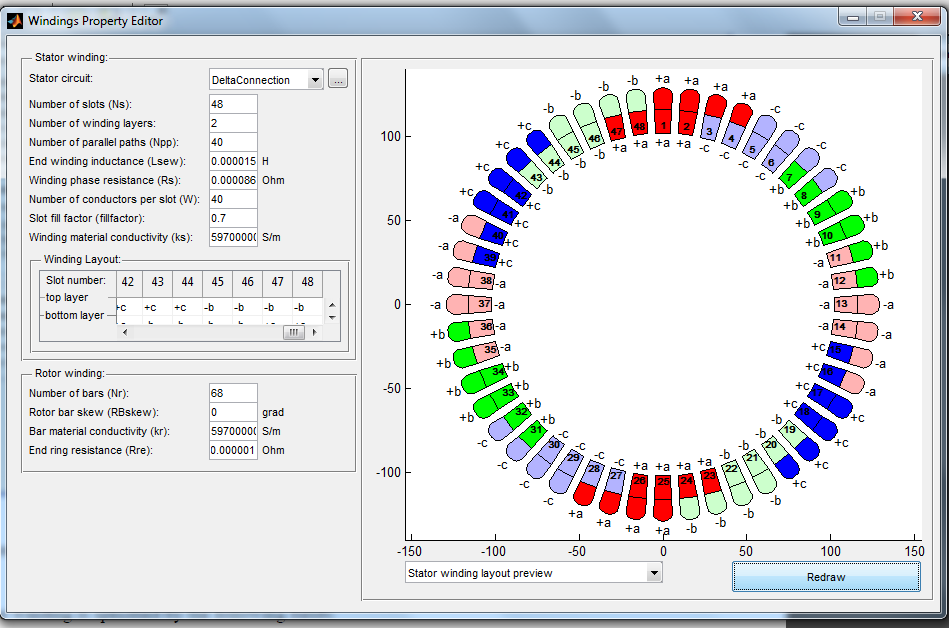

In [116]:
from IPython.display import Image
Image(filename='windinglayout.png')  # 10/12 coil span

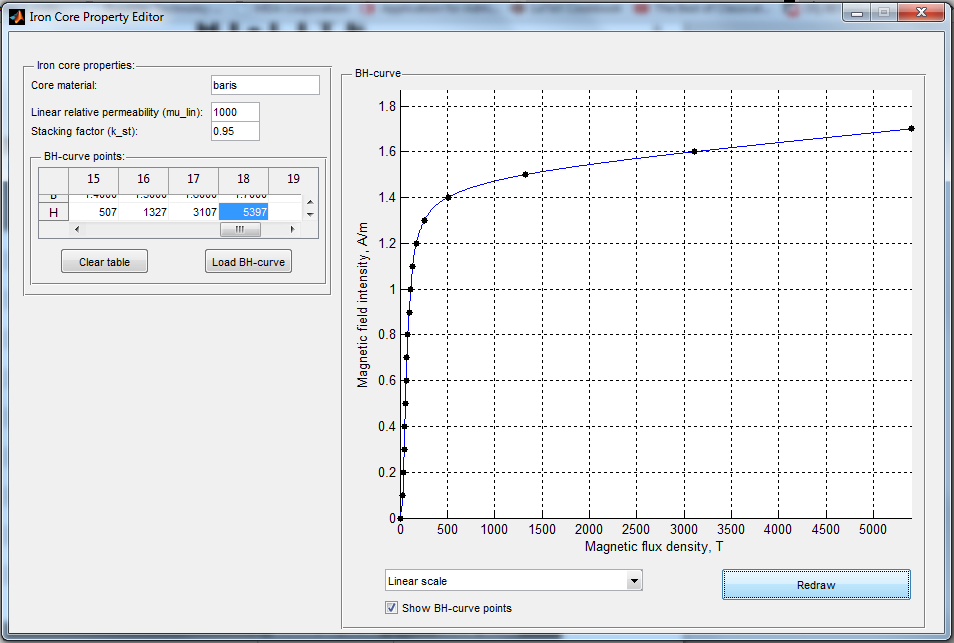

In [118]:
from IPython.display import Image
Image(filename='BHcurve.PNG')  

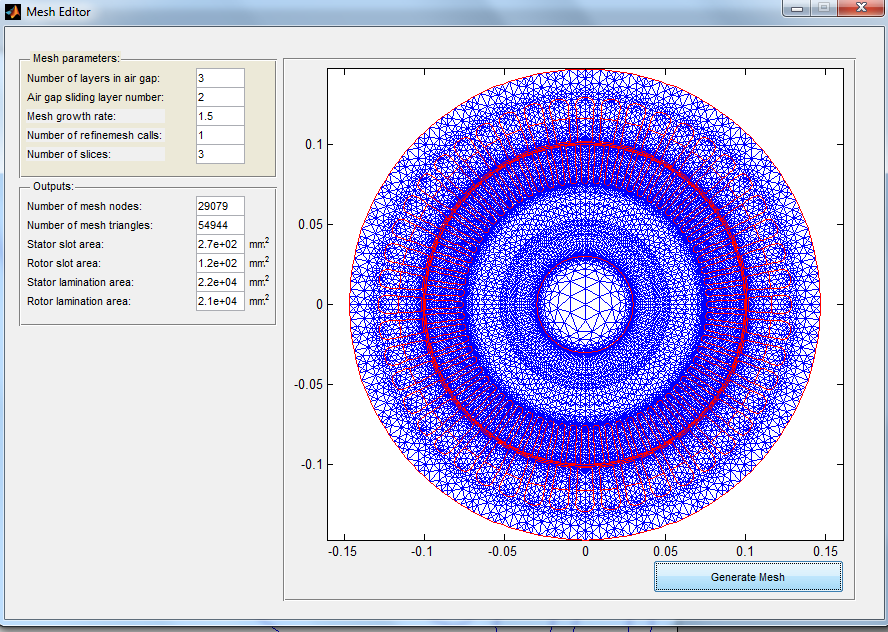

In [119]:
from IPython.display import Image
Image(filename='mesh.PNG')  

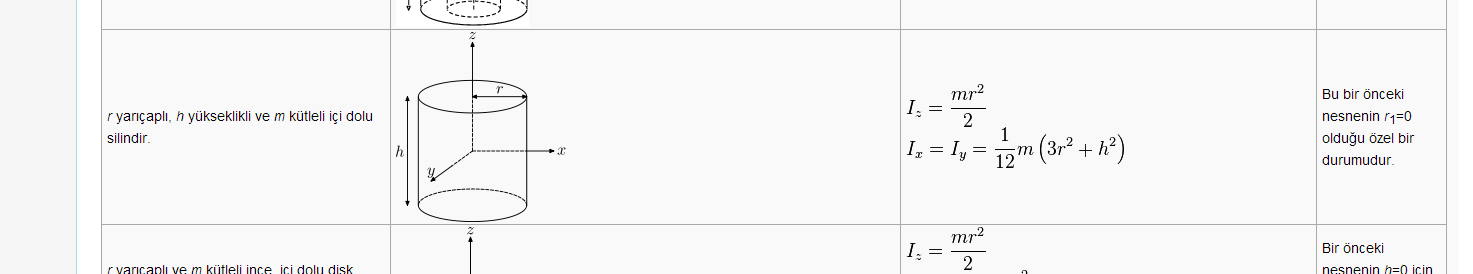

In [120]:
from IPython.display import Image
Image(filename='moment.PNG')  

In [122]:
m=0.202**2.0/4.0*math.pi*0.202*7650#7.65g/cm3=7650kg/m3
print m

49.5228266046


In [124]:
J=m/12*(3*((Ds/2)**3) +Ds**2)
print J

0.181905024053
